# Fundamentals of Data Analysis (FoDA) - Project 2020

                                                                          Author: Sheldon D'Souza, email: G00387857@gmit.ie

***

# Objective

The objective of the project is to perform and explain simple linear regression using Python on the powerproduction dataset given. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

The git repository will contain, at a minimum, the following items:
1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance the submission, consider comparing simple linear regression to other types of regression on this data set.

## Project Plan:

- Use lecture notes from ProgDA module (Machine learning - sklearn) which goes regression and machine learning concepts
- Read through and research linear regression and other forms of regression (e.g. exponential etc)
- add powerproduction.csv to the repository
- load the csv file into a pandas dataframe
- analyse the data to ensure its integrity
- plot the data using a lineplot and regression plot
- use sklearn to perform linear regression and analyse the results
- perfrom other sorts of analysis


## Introduction

What is regression and the forms of regression


**[TO BE COMPLETED]**


What is the purpose and uses of regression

**[TO BE COMPLETED]**



## Import the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Import the csv and load pandas dataframe

In [2]:
df = pd.read_csv('powerproduction.csv', sep=',')

#### Analyse the head of the dataframe

In [3]:
df.head(10) #Analyse the first few rows

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


#### Analyse the tail of the dataframe

In [4]:
df.tail(10) #Analyse the last  few rows

,speed,power
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


#### Analyse the summay of the dataframe

In [5]:
df.describe() # check summary of data

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


#### Data where 'power' variable is Nil

In the cells below, I did a check to see how many values of power had a nil value. We made the following observations:

- Speed values of 0.275 and less and nil power output. This could be explained by the wind speed being two low to generate any power i.e. there is a mimimum threshold of wind speed to generate power.
- Speed values of 24.499 and above had nil power output. We would expect that after a certain windspeed, there would be no further incresase in power output. I would have expected these speed variables to have a constant value (of the maximum output) rather than a nil value
- There were certain values in the middle where the power was nil for a moderate amount of speed. I have assumed that these are anomalies in the data. I have ignored them for the purpose of the regression analysis, as I do not believe that they will have a material impact on the regression analysis. If there is time, I may clean up the data and check the impact on the regression analysis.


In [6]:
zeros=df.loc[df['power'] == 0]
zeros

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
15,0.726,0.0
16,0.751,0.0
24,1.026,0.0
26,1.076,0.0
31,1.301,0.0


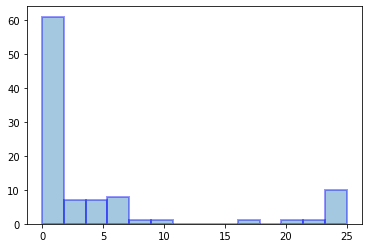

In [7]:
# Plot a histogram of zero values generated

sns.distplot(zeros, kde=False, hist_kws=dict(edgecolor="b", linewidth=2))

## Plot of the Data for visualisation - scatterplot with seaborn

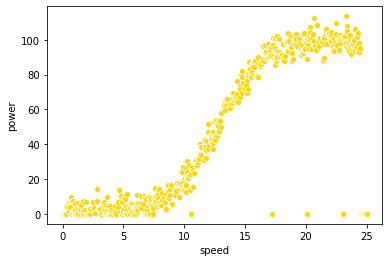

In [8]:
# Plot the data points as a scatterplot to visualise the data

sns.scatterplot(data = df, x="speed", y="power", color='gold')
plt.style.use('ggplot')
plt.show()

In [9]:
correlation_xy = np.corrcoef(df['speed'],df['power'])[0,1]


r_squared = correlation_xy**2

print('Correlation Coefficient is', round(correlation_xy * 100, 2), '%')
print('R-Squared Value is', round(r_squared*100, 2),'%')

Correlation Coefficient is 85.38 %
R-Squared Value is 72.89 %


## Linear regression plot with seaborn

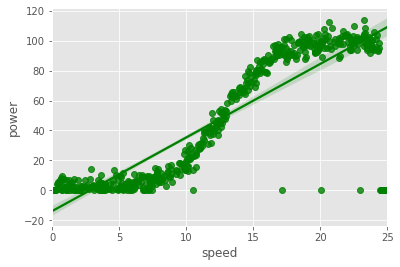

In [10]:
#use the linear regresssion plot within seaborn, to visualise the linear regression line

sns.regplot(data = df, x="speed", y="power", color='green')
plt.style.use('ggplot')
plt.show()

## Train and test the Linear Regression model

In [11]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, 1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression
pp_model = LinearRegression()
pp_model.fit(X_train, y_train)

LinearRegression()

In [14]:
pp_model.score(X, y) # R-Squared value from the model

0.7289210311482306

In [15]:
print(pp_model.intercept_) #The y intercept  of the linear regression line

-13.603433993820211


In [16]:
print(pp_model.coef_) # The coefficient or 'slope' of the linear regression line

[4.89542079]


In [17]:
y_pred = pp_model.predict(X_test)

### Analyse the output from the Train and Test Linear Regression Model

,Actual,Predicted
0,7.060,10.408605
1,51.149,48.632051
2,71.763,57.326318
3,99.357,96.161691
4,113.556,100.327694
...,...,...
95,96.058,77.911562
96,3.578,1.097515
97,93.931,95.304992
98,0.000,1.709442


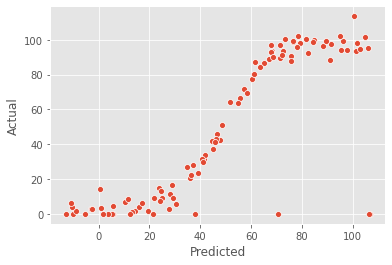

In [18]:
act_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


sns.scatterplot(act_vs_pred['Predicted'], act_vs_pred['Actual'])

act_vs_pred

We would expect the scatterplot of the actual vs predicted to be a straight line as we would expect the predicted and actual values to be identical (for a perfect model).

Interestingly the shape of the scatterplot of comparisons very closely mirrors the original data. This makes sense as a linear fit will cause linear differences between the predicted and the actual data and hence the shape of the data in the above scatteplot will be maintained.

We will try to analyse (time permitting) why this is the case.

## Test Case - Using the Lasso regression model

,Actual,Predicted
0,7.060,13.986095
1,51.149,48.541124
2,71.763,56.400976
3,99.357,91.509204
4,113.556,95.275383
...,...,...
95,96.058,75.010594
96,3.578,5.568618
97,93.931,90.734725
98,0.000,6.121817


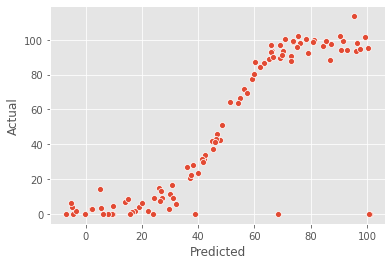

In [19]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=25)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


act_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

sns.scatterplot(act_vs_pred['Predicted'], act_vs_pred['Actual'])

act_vs_pred

## Exploring Polynomial Regression

In [20]:
# https://www.w3schools.com/python/python_ml_polynomial_regression.asp

#The code below checks for the r-squared value for the dataset to check for fit 

import numpy as np
from sklearn.metrics import r2_score

a =  df["speed"]
b =df["power"]

mymodel = np.poly1d(np.polyfit(a, b, 10))

print(r2_score(b, mymodel(a)))

0.9385804041397149


In [21]:
# https://www.analyticsvidhya.com/blog/2020/03/polynomial-regression-python/

from sklearn.linear_model import LinearRegression

# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures

# for creating pipeline
from sklearn.pipeline import Pipeline

# creating pipeline and fitting it on data
Input = [('polynomial',PolynomialFeatures(degree=10)),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(X_train, y_train)


Pipeline(steps=[('polynomial', PolynomialFeatures(degree=10)),
                ('model', LinearRegression())])

,Actual,Predicted
0,7.060,4.892988
1,51.149,50.866459
2,71.763,70.898748
3,99.357,100.066815
4,113.556,102.785507
...,...,...
95,96.058,97.186745
96,3.578,1.729847
97,93.931,98.968952
98,0.000,1.941607


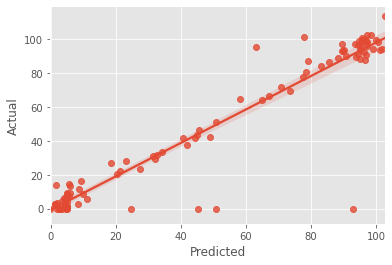

In [22]:
poly_pred=pipe.predict(X_test)

act_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': poly_pred})

sns.regplot(act_vs_pred['Predicted'], act_vs_pred['Actual'])


act_vs_pred

## Building my own model

Analysing the original scatterplot data, it can be observed that the data form an S-Curve. In other words the curve remains constant at a certain upper and lower ranges of values for the independent variable. 

In the current dataset, we can see that the power output is nil or near to nil for certain values lower values of wind 'speed'. We also note that after a certain wind speed no additional power is generated.

Again, observing the data we can see that for windspeed of less 8 the power remains very low and can be estimated to be Nil. Also where the speed is > 18 the power remains constant at around 100. There also seem to be anomolies within the data where at random points in the dataset the power output seems to be zero. It is reasonable to assume that these are error in collecting, collating or recording the data.

I have produced a cleaned dataset to remove all observations where:
- The 'speed' is less than 8
- The 'speed' is greater than or equal than 18
- The 'power' is Nil

I then plotted the new dataset and calculated the correlation coefficient and the R-Squared values for the new dataset. As can be seen below the new dataset is highly correlated with a R-Squared value of 97%.

Correlation Coefficient is 98.49 %
R-Squared Value is 96.99 %
The polynomial equation for the clean dataset is:  
10.22 x - 80.18
10.223218939110662


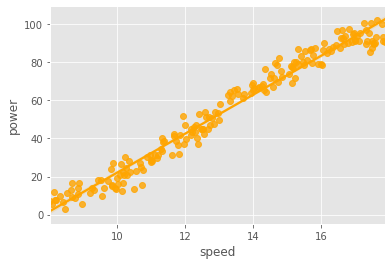

In [60]:
clean_df = df.query('speed > 8  & speed < 18 & power != 0')

clean_df_correlation_xy = np.corrcoef(clean_df['speed'],clean_df['power'])[0,1]

clean_df_r_squared = clean_df_correlation_xy**2

p_clean = np.poly1d(np.polyfit(clean_df['speed'], clean_df['power'], 1))



print('Correlation Coefficient is', round(clean_df_correlation_xy * 100, 2), '%')
print('R-Squared Value is', round(clean_df_r_squared*100, 2),'%')
print('The polynomial equation for the clean dataset is:', p_clean)



sns.regplot(data = clean_df, x="speed", y="power", color='orange')
plt.style.use('ggplot')
plt.show()

I considered a mutistep model where the output values predicted would be based on a multi-step model based on the value of the input.

In essence this will be similar to the polynomial regression model above, however this will be more streamlined as it will segregate the highly correlated linear model data seperately.

I considered, using fixed output value for the data where the input range was <8 and >18, however, I decided it would be better to break down the data into the 3 components of the S curve (cut-in values and cut-off values) and use separate regression values for each of the component.

In the next code cell I segregated the data into the top and bottom component of the S curve and checked the best regression coefficients and technique for these components.

Correlation Coefficient is 40.79 %
R-Squared Value is 16.64 %
The polynomial equation for the clean dataset is: 
         2
0.2006 x - 1.23 x + 5.45


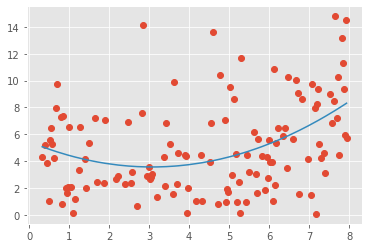

In [125]:
bottom_clean_df = df.query('speed <=8 & power != 0')

p_bottom = np.poly1d(np.polyfit(bottom_clean_df['speed'], bottom_clean_df['power'], 2))

plt.plot(bottom_clean_df['speed'], bottom_clean_df['power'], 'o', bottom_clean_df['speed'], p_bottom(bottom_clean_df['speed']), '-')


bottom_clean_df_correlation_xy = np.corrcoef(bottom_clean_df['power'], p_bottom(bottom_clean_df['speed']))[0,1]
                                             
bottom_clean_df_r_squared = bottom_clean_df_correlation_xy**2


print('Correlation Coefficient is', round(bottom_clean_df_correlation_xy * 100, 2), '%')
print('R-Squared Value is', round(bottom_clean_df_r_squared*100, 2),'%')
print('The polynomial equation for the clean dataset is: \n', 
      p_bottom)



Correlation Coefficient is 19.85 %
R-Squared Value is 3.94 %
The polynomial equation for the clean dataset is:  
0.5007 x + 87.98
128.0307979124346


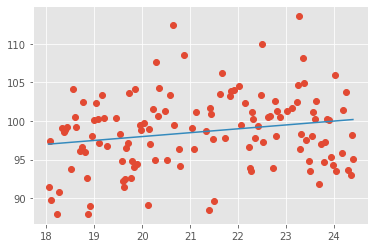

In [116]:
top_clean_df = df.query('speed >=18 & power != 0')

p_top = np.poly1d(np.polyfit(top_clean_df['speed'], top_clean_df['power'], 1)) #may be better to use linear function for this as well

plt.plot(top_clean_df['speed'], top_clean_df['power'], 'o', top_clean_df['speed'], p_top(top_clean_df['speed']), '-')


top_clean_df_correlation_xy = np.corrcoef(top_clean_df['power'], p_top(top_clean_df['speed']))[0,1]
                                             
top_clean_df_r_squared = top_clean_df_correlation_xy**2


print('Correlation Coefficient is', round(top_clean_df_correlation_xy * 100, 2), '%')
print('R-Squared Value is', round(top_clean_df_r_squared*100, 2),'%')
print('The polynomial equation for the clean dataset is:', p_top)

print(p_top(80))


#### Predictions based on the model

I used the Linear Regression model from sklearn to obtain the intercept and slope for the cleaned dataset. I then used the select function in numpy to 'predict' the 'power' variable based on certain conditions of the 'speed' data. These conditions mirrored the cleaned data criteria and are as follows:

- [TO BE COMPLETED]

coefficient of determination: 0.9699472511115248
intercept: -80.18146085776245
slope: [10.22321894]


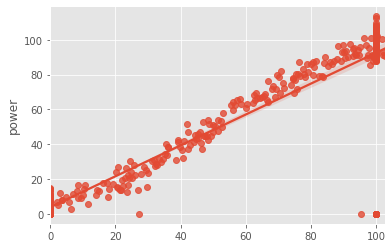

In [24]:
# To modify this code once the above is completed. 

#y_pred = np.select((df['speed'] <= 8, df['speed'] >= 18, (df['speed'] > 8) | (df['speed'] < 18)), (0, 100, (model.intercept_ + model.coef_ * df['speed'])))


#sns.regplot( y_pred, df['power'])


#print(df['power'])
#print(y_pred)


### Reference:

https://stackabuse.com/linear-regression-in-python-with-scikit-learn/